**Sensitivity Model** for the **HL** Category: High Vulnerability and Low Resilience

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
# Read in data and define x and y
df = pd.read_csv('2_sensitivity_HL.csv')
y = df['sen_mean']
x = df.drop(['NAME','Kmeans_t','vulnerability','sen_w','sen_un','sen_mean'], axis = 1)

,NAME,Kmeans_t,vulnerability,sen_w,sen_un,sen_mean,pop,popdenA,popgrow,femaleR,...,sport_1000,edu_1000,parkA,nointerR,fac_1000,popinR,disabR,asthmaR,physicalR,mentalR
0,5007.0,HL,6.697910,5.679761,5.553183,5.616472,1.638770,1.450119,0.677877,-0.480415,...,-0.111512,1.048060,-0.584170,-0.150966,-0.340930,-0.159602,-0.366050,0.645487,-0.153457,0.710575
1,5009.0,HL,6.446847,5.562458,5.181637,5.372047,0.795361,0.829984,1.246474,0.369187,...,-0.111512,-0.085074,-0.387788,-0.616550,-0.340930,-0.166426,0.271660,1.209494,0.584336,1.201196
2,5010.0,HL,6.216128,5.170833,4.890930,5.030882,0.462784,1.263725,0.353656,0.893171,...,-0.111512,0.020227,-0.525338,-0.064746,-0.340930,-0.321677,-0.218065,1.035953,0.452587,1.061019
3,5011.0,HL,6.466253,5.748357,5.271307,5.509832,0.188800,0.150661,0.721429,1.248732,...,-0.111512,0.129058,-0.584170,1.004373,-0.340930,0.195258,0.466939,1.035953,0.584336,0.955886
4,5012.0,HL,6.741391,6.676497,6.153709,6.415103,-0.923642,0.071157,-0.798055,0.754690,...,-0.111512,2.037518,-0.584170,2.202821,-0.340930,0.108249,1.554708,1.209494,0.663385,1.236241
5,5013.0,HL,6.853711,6.300735,6.019703,6.160219,0.302685,0.249600,-1.131954,0.737848,...,-0.111512,0.080859,-0.570912,0.961263,-0.340930,-0.089654,0.682052,1.122724,0.452587,0.955886
6,5016.0,HL,6.108096,5.305515,5.054030,5.179772,-0.379800,-0.320182,0.711751,0.653636,...,-0.111512,0.458929,0.677813,0.366350,-0.340930,0.384631,0.160289,0.428561,0.004642,0.395175
7,5019.0,HL,6.552559,6.212851,5.941697,6.077274,0.157440,1.481038,-0.582714,-0.205323,...,-0.111512,0.143027,-0.584170,0.211155,-0.340930,0.483582,-0.695584,1.166109,0.663385,1.166152
8,5026.0,HL,7.030042,6.475562,5.549261,6.012411,1.000849,-0.570180,-1.371491,0.150237,...,-0.111512,0.256002,2.211582,0.711227,-0.340930,0.120192,1.483003,0.992568,0.610686,0.850753
9,5027.0,HL,6.750647,6.712741,5.805368,6.259055,-0.223002,-0.741557,-1.371491,0.831416,...,-0.111512,0.349023,-0.584170,0.676740,0.843617,0.087776,0.773589,1.426420,1.295779,1.061019


1. Run the random forest exposure model

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

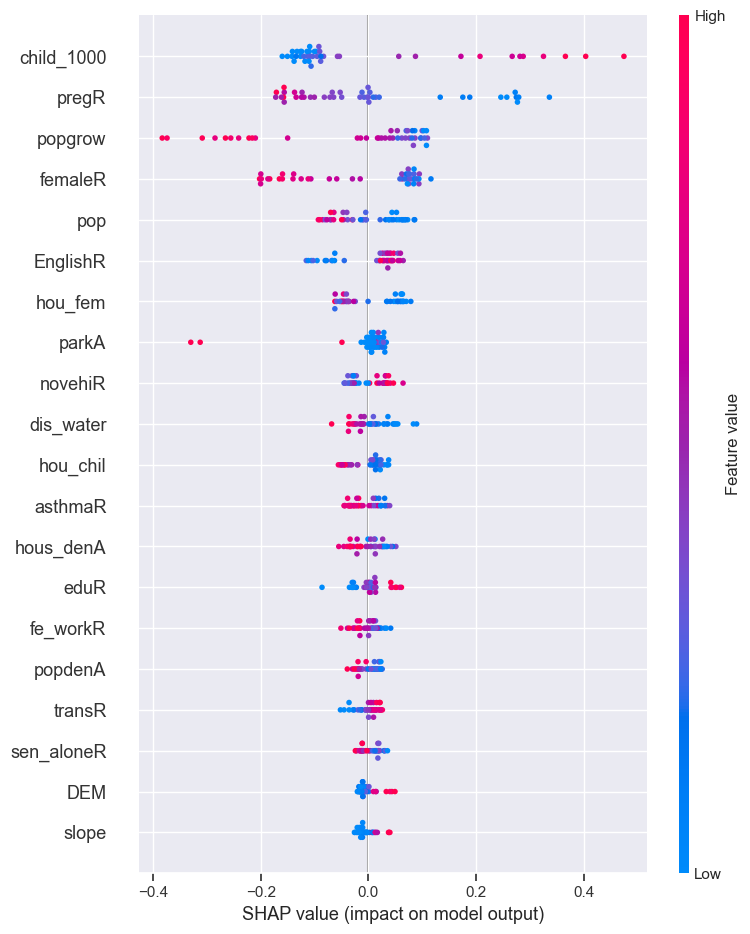

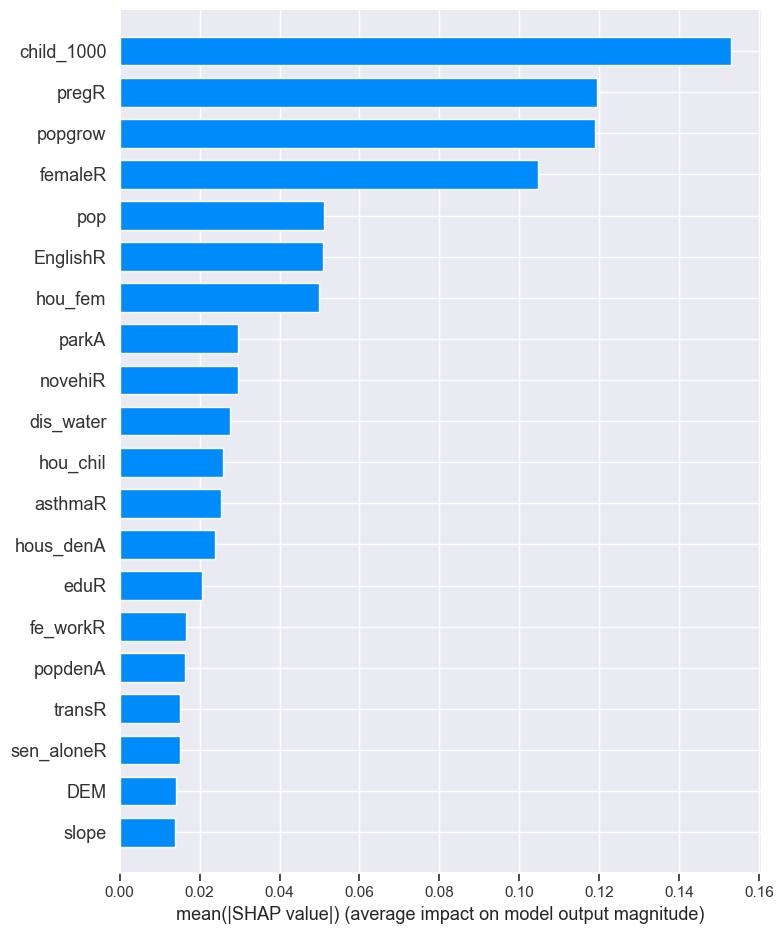

[0.3452]
[0.4150879596103345]
[0.6683842398624001]
[0.41706509209463377]
[0.4892321892202539]
{'max_depth': 20, 'max_features': None, 'n_estimators': 50}


In [9]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

2. Backward feature selection

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 20, 
    max_features = None, 
    n_estimators=50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pop', 'popdenA', 'popgrow', 'agedeR', 'eduR', 'EnglishR', 'nonwhiteR',
       'pregR', 'hou_size', 'hou_chil', 'sen_aloneR', 'Gini', 'home_rentR',
       'vacant', 'novehiR', 'unemployR', 'fe_workR', 'river_lenA', 'DEM',
       'NDVI', 'road_floA', 'dev_floA', 'child_1000', 'sport_1000', 'parkA',
       'fac_1000', 'popinR', 'asthmaR', 'mentalR'],
      dtype='object')


                     pop   popdenA   popgrow   femaleR  elderlyR    agedeR  \
pop             1.000000  0.324057  0.341113  0.082282 -0.291348  0.306876   
popdenA         0.324057  1.000000  0.169093  0.099002 -0.233304  0.105743   
popgrow         0.341113  0.169093  1.000000  0.126758 -0.095192  0.181723   
femaleR         0.082282  0.099002  0.126758  1.000000  0.093595  0.427300   
elderlyR       -0.291348 -0.233304 -0.095192  0.093595  1.000000 -0.340534   
agedeR          0.306876  0.105743  0.181723  0.427300 -0.340534  1.000000   
age5R           0.169324  0.002324  0.162679  0.268796 -0.086262  0.607970   
eduR           -0.041401 -0.022679 -0.006721 -0.155832  0.176102  0.142681   
EnglishR       -0.154817 -0.056890 -0.142988 -0.520771  0.226713 -0.764161   
nonwhiteR      -0.247558 -0.367251 -0.111289  0.382390  0.489812  0.024947   
pregR           0.256601  0.260168  0.094914  0.310618 -0.609626  0.022323   
hou_size        0.395278  0.266298  0.067252  0.048794 -0.483495

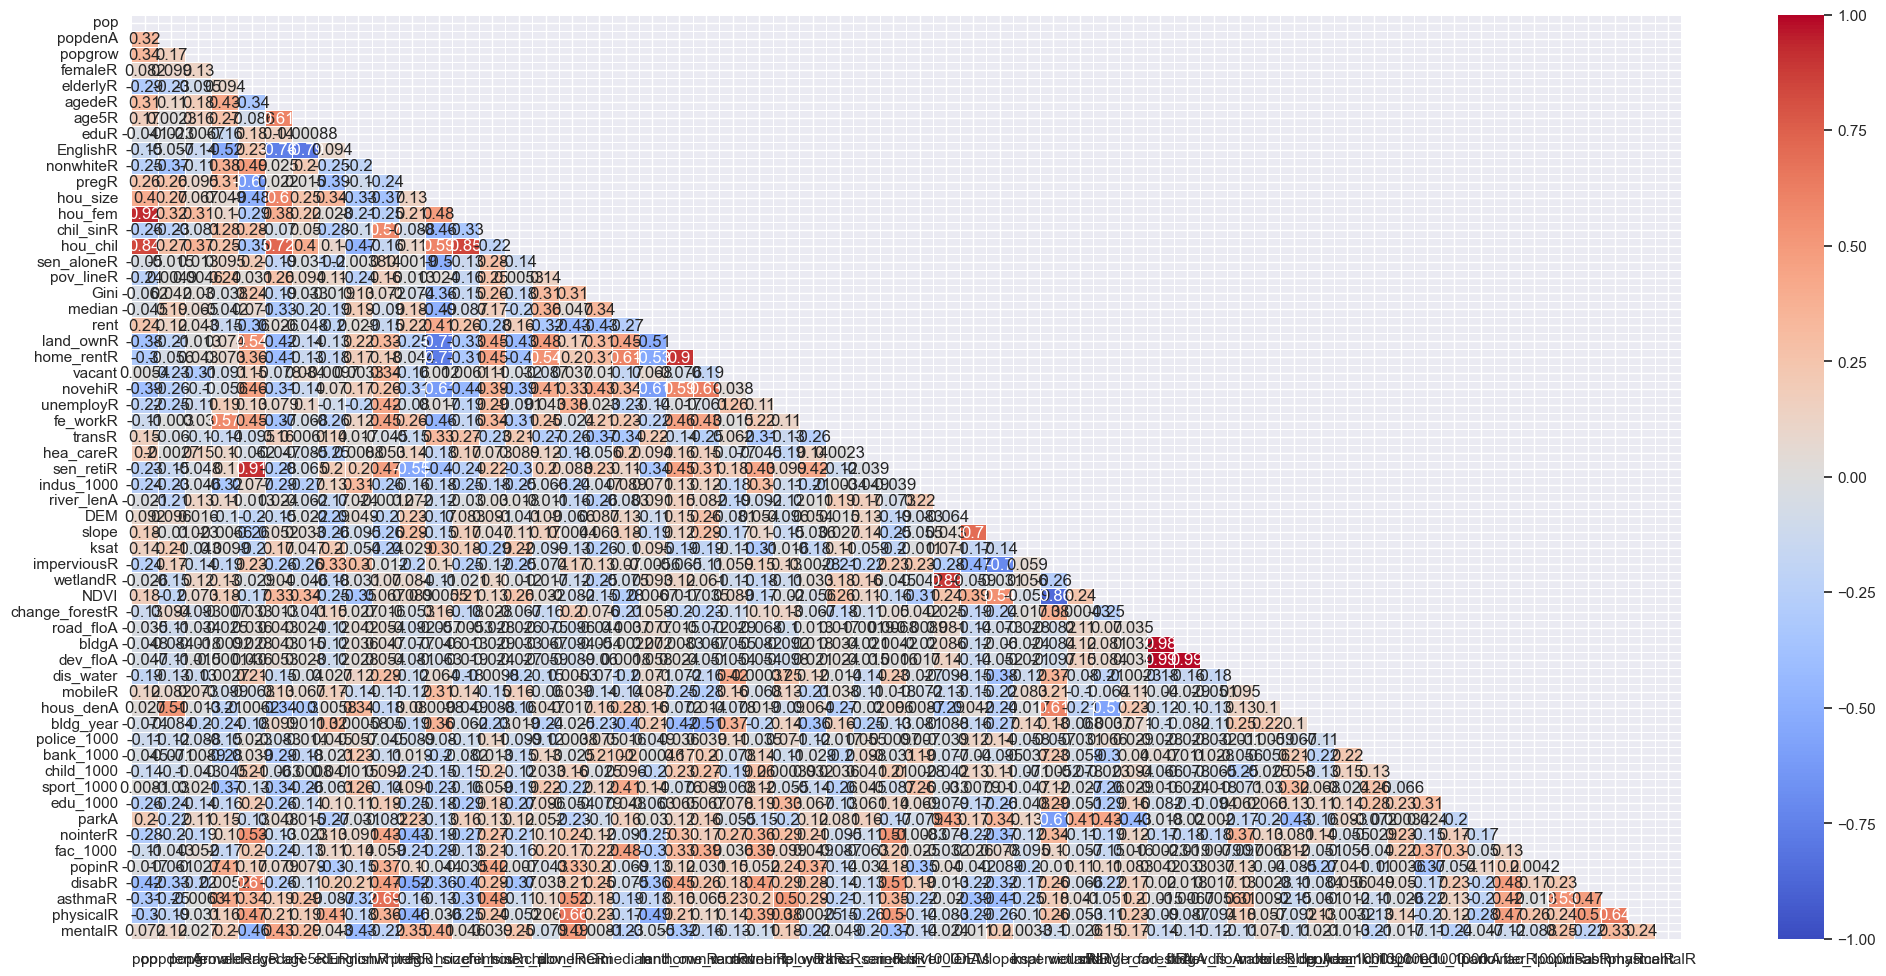

In [14]:
# Calculate the correlation matrix to analyze the relationships between features
correlation_matrix = x.corr()
print(correlation_matrix)

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Plot the heatmap with the x-axis labels aligned horizontally
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"orientation": "vertical"}
)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

3. Rerun the random forest sensitivity model

In [ ]:
y = df['sen_mean']
x = df[['pop', 'popdenA', 'popgrow', 'agedeR', 'eduR', 'EnglishR', 'nonwhiteR',
       'pregR', 'hou_size', 'hou_chil', 'sen_aloneR', 'Gini', 'home_rentR',
       'vacant', 'novehiR', 'unemployR', 'fe_workR', 'river_lenA', 'DEM',
       'NDVI', 'road_floA', 'dev_floA', 'child_1000', 'sport_1000', 'parkA',
       'fac_1000', 'popinR', 'asthmaR', 'mentalR']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_e

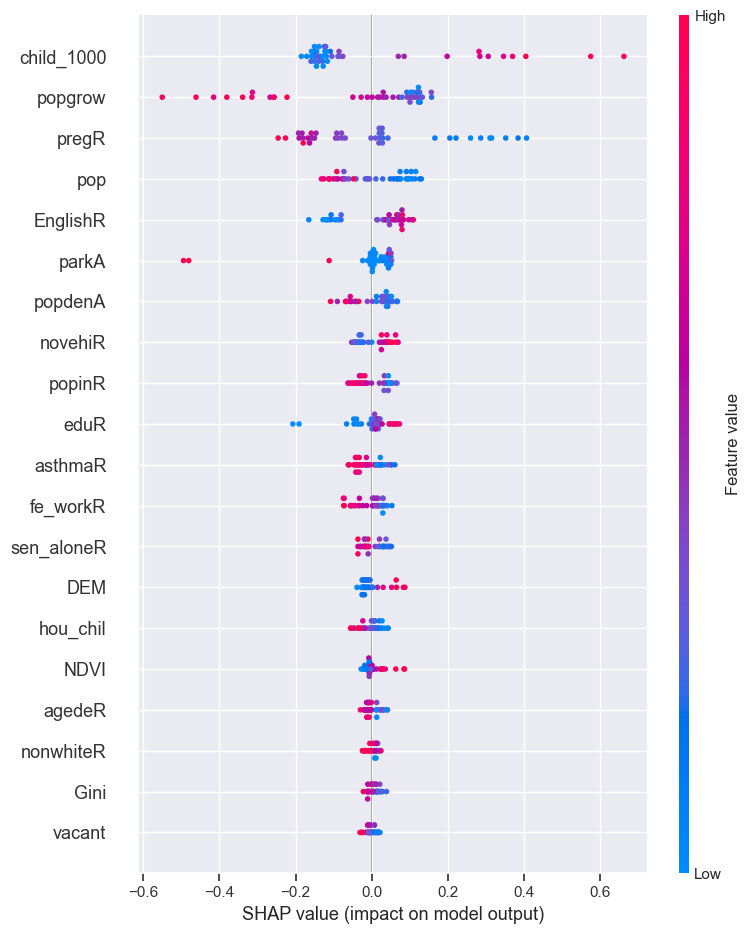

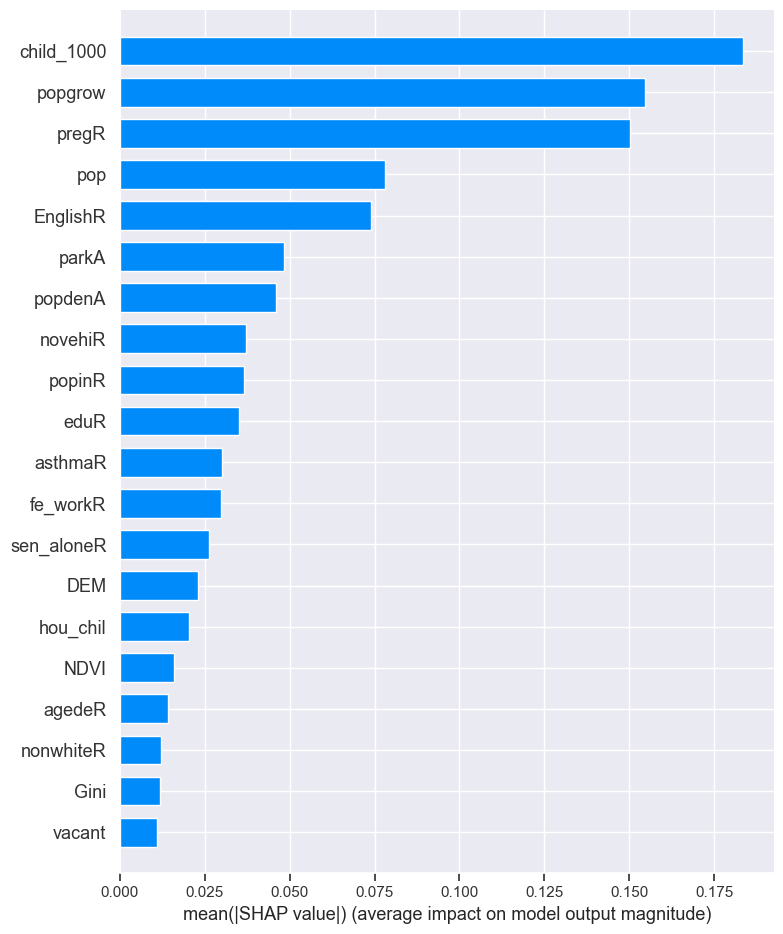

[0.4931]
[0.49364099977588594]
[0.6918127829856743]
[0.43159937998868725]
[0.452797235591308]
{'max_depth': 10, 'max_features': None, 'n_estimators': 50}


In [21]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

4. Perform backward feature selection again to identify and eliminate irrelevant variables, streamlining the model and improving its efficiency.

In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 10, 
    max_features = None, 
    n_estimators=50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pop', 'popgrow', 'eduR', 'EnglishR', 'pregR', 'hou_size', 'sen_aloneR',
       'home_rentR', 'vacant', 'fe_workR', 'DEM', 'child_1000', 'parkA',
       'popinR', 'asthmaR'],
      dtype='object')


5. Rerun the random forest model

In [ ]:
y = df['sen_mean']
x = df[['pop', 'popgrow', 'eduR', 'EnglishR', 'pregR', 'hou_size', 'sen_aloneR',
       'home_rentR', 'vacant', 'fe_workR', 'DEM', 'child_1000', 'parkA',
       'popinR', 'asthmaR']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_e

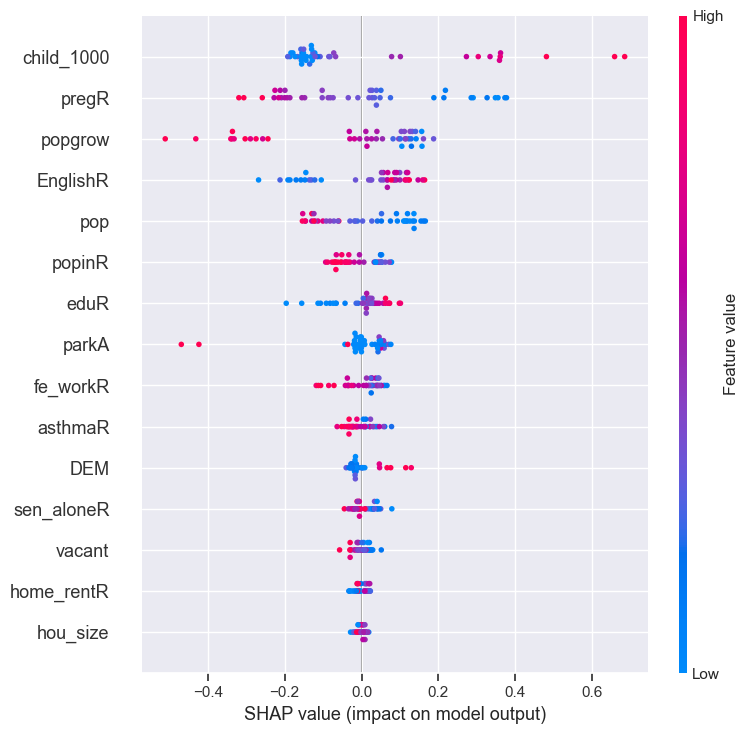

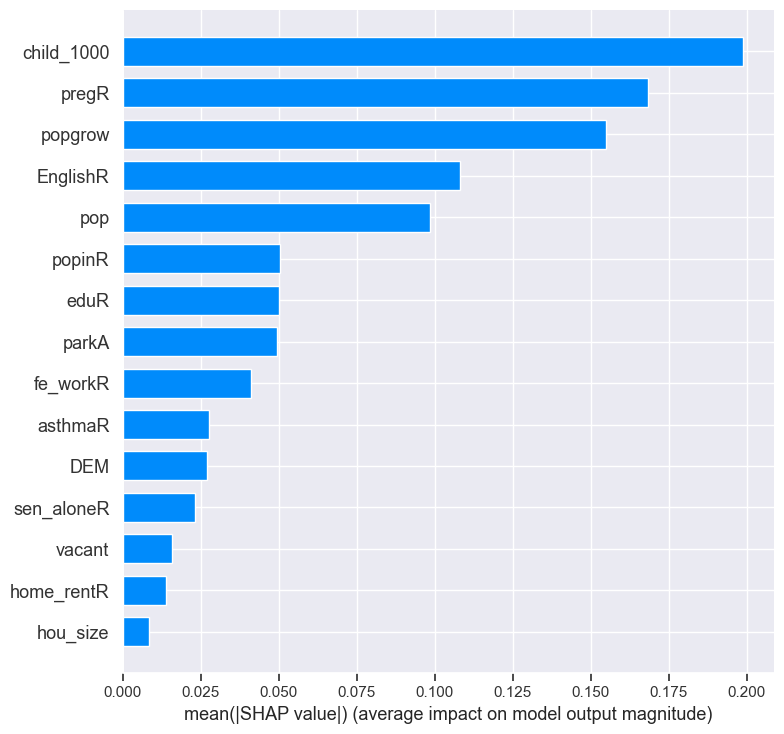

[0.4976]
[0.48867717817119727]
[0.7017102594917193]
[0.42726979467609744]
[0.4370280323096517]
{'max_depth': 20, 'max_features': None, 'n_estimators': 50}


In [34]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

6. Perform backward feature selection again to identify and eliminate irrelevant variables, streamlining the model and improving its efficiency.

In [36]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 20, 
    max_features = None, 
    n_estimators=50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pop', 'popgrow', 'eduR', 'EnglishR', 'pregR', 'vacant', 'fe_workR',
       'child_1000'],
      dtype='object')


7. Rerun the random forest model

In [ ]:
y = df['sen_mean']
x = df[['pop', 'popgrow', 'eduR', 'EnglishR', 'pregR', 'vacant', 'fe_workR',
       'child_1000']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_e

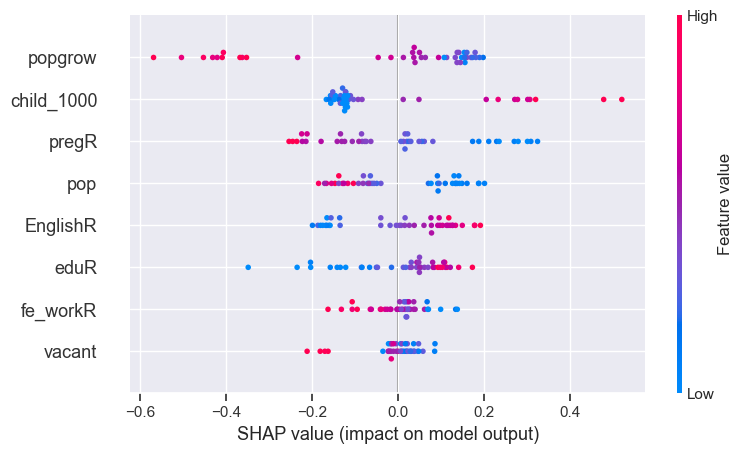

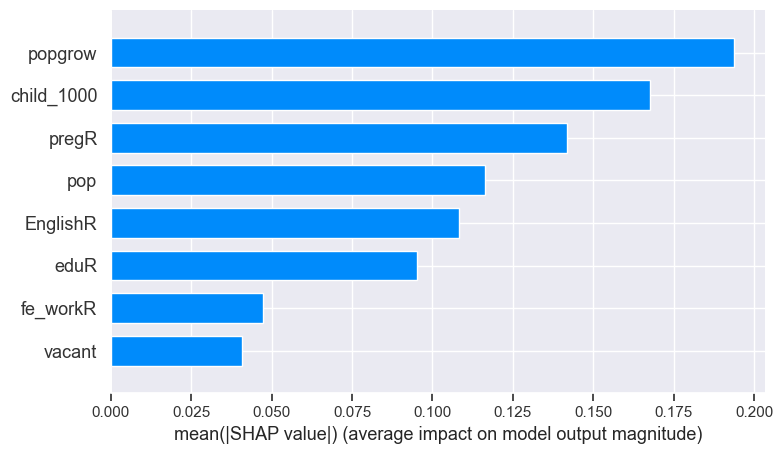

[0.4913]
[0.47117115027137824]
[0.7206441500865088]
[0.4424672602775012]
[0.40623738602627535]
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [46]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)